# Lab 2:  Problem 1

In [ ]:
from IPython.core.display import HTML
def css_styling():
    styles = open("../styles/tma4215.css", "r").read()
    return HTML(styles)

# Comment out next line and execute this cell to restore the default notebook style 
css_styling()

We start with a quick reminder of what we did in Lecture 8.

$$
\DeclareMathOperator{\Div}{div}
\DeclareMathOperator{\Grad}{grad}
\DeclareMathOperator{\Curl}{curl}
\DeclareMathOperator{\Rot}{rot}
\DeclareMathOperator{\ord}{ord}
\DeclareMathOperator{\Kern}{ker}
\DeclareMathOperator{\Image}{im}
\DeclareMathOperator{\spann}{span}
\DeclareMathOperator{\rank}{rank}
\DeclareMathOperator{\dist}{dist}
\DeclareMathOperator{\diam}{diam}
\DeclareMathOperator{\sig}{sig}
\DeclareMathOperator{\Id}{Id}
\newcommand{\RR}{\mathbb{R}}
\newcommand{\NN}{\mathbb{N}}
\newcommand{\VV}{\mathbb{V}}
\newcommand{\dGamma}{\,\mathrm{d} \Gamma}
\newcommand{\dGammah}{\,\mathrm{d} \Gamma_h}
\newcommand{\dx}{\,\mathrm{d}x}
\newcommand{\dy}{\,\mathrm{d}y}
\newcommand{\ds}{\,\mathrm{d}s}
\newcommand{\dt}{\,\mathrm{d}t}
\newcommand{\dS}{\,\mathrm{d}S}
\newcommand{\dV}{\,\mathrm{d}V}
\newcommand{\dX}{\,\mathrm{d}X}
\newcommand{\dY}{\,\mathrm{d}Y}
\newcommand{\dE}{\,\mathrm{d}E}
\newcommand{\dK}{\,\mathrm{d}K}
\newcommand{\dM}{\,\mathrm{d}M}
\newcommand{\cd}{\mathrm{cd}}
\newcommand{\onehalf}{\frac{1}{2}}
\newcommand{\bfP}{\boldsymbol P}
\newcommand{\bfx}{\boldsymbol x}
\newcommand{\bfy}{\boldsymbol y}
\newcommand{\bfa}{\boldsymbol a}
\newcommand{\bfu}{\boldsymbol u}
\newcommand{\bfv}{\boldsymbol v}
\newcommand{\bfe}{\boldsymbol e}
\newcommand{\bfb}{\boldsymbol b}
\newcommand{\bfc}{\boldsymbol c}
\newcommand{\bfq}{\boldsymbol q}
\newcommand{\bfy}{\boldsymbol y}
\newcommand{\bff}{\boldsymbol f}
\newcommand{\bfp}{\boldsymbol p}
\newcommand{\bft}{\boldsymbol t}
\newcommand{\bfj}{\boldsymbol j}
\newcommand{\bfB}{\boldsymbol B}
\newcommand{\bfV}{\boldsymbol V}
\newcommand{\bfE}{\boldsymbol E}
\newcommand{\bfB}{\boldsymbol B}
\newcommand{\bfzero}{\boldsymbol 0}
$$
## Reduced QR Factorization

Let $A \in \RR^{m,n}$ and
assume that we have a (full) $QR$ factorization such that

\begin{align}
A = 
Q
\begin{pmatrix}
\widehat{R}
\\
0
\end{pmatrix} \in \RR^{m,n}
\end{align}
where $Q = (\bfq_1 | \cdots | \bfq_m) \in O(m)$ is a orthogonal matrix, and 
$\widehat{R} \in \RR^{n,n}$ is an upper triangular matrix.

Then the __full__ $QR$ factorization can be transformed
into a __reduced__ $QR$ factorizations of the form
\begin{align}
A = 
\widehat{Q}
\widehat{R}
 \in \RR^{m,n}
\end{align}
with $\widehat{Q} = (\bfq_1 | \cdots | \bfq_n) \in  \RR^{m,n}$
satisfying $\widehat{Q}^T \widehat{Q} = \Id_n \in \RR^{n,n}$. Here $\Id_n$ denotes
the $n \times n$ Identity matrix.

Recall from Lecture 7 that we can solve the least squares problem (l.s.p) by using the full QR factorization as follows:

1) Define
\begin{align*}
Q^T \bfb 
= \begin{pmatrix}
\bfb_1
\\
\bfb_2
\end{pmatrix}
\end{align*}
with $\bfb_1 \in \RR^n$ and $\bfb_2 \in \RR^{m-n}$.

2) Solve 
$$
\widehat{R} \bfx = \bfb_1
$$

Note that $\bfb_1 = \widehat{Q}^T \bfb$ so
to solve the l.s.p you only need to compute the __reduced__ $QR$ factorization.

## Gram-Schmidt Orthogonalization


We quickly review the Gram-Schmidt orthogonalization method and show that
it in fact can be used to compute the reduced $QR$ factorization.

Let $\{\bfa_1,\ldots,\bfa_n\} \subset \RR^m$ $n$ linear independent
vectors in $\RR^m$. The Gram-Schmidt orthogonalization process
allows to orthogonalizes that set, that means, we can construct
a set $\{\bfq_1, \ldots, \bfq_n \}$ of orthogonal (orthonormal) vectors which have the same span as the original set.

\begin{alignat*}{3}
\bfy_1 &:= \bfa_1, \quad & &\bfq_1 := \dfrac{\bfy_1}{\|\bfy_1\|}
\\
\bfy_2 &:= \bfa_2 - \langle \bfq_1, \bfa_2 \rangle \bfq_1, \quad & &\bfq_2 := \dfrac{\bfy_2}{\|\bfy_2\|}
\\
\ldots 
\\
\bfy_k &:= \bfa_k - \sum_{i=1}^{k-1} \langle \bfq_i, \bfa_k \rangle \bfq_i, \quad & &\bfq_k := \dfrac{\bfy_k}{\|\bfy_k\|}
\\
\ldots
\\
\bfy_n &:= \bfa_n - \sum_{i=1}^{n-1} \langle \bfq_i, \bfa_n \rangle \bfq_i, \quad & &\bfq_n := \dfrac{\bfy_n}{\|\bfy_n\|}
\end{alignat*}

Next, we use that $\bfa_i$ rewrite as

\begin{align*}
\bfa_1 &:= \underbrace{\| \bfy_1\|}_{r_{11}} \bfq_1
\\
\bfa_2 &:= \underbrace{\| \bfy_2 \|}_{r_{22}} \bfq_2 
+ \underbrace{\langle \bfq_1, \bfa_2 \rangle}_{r_{12}} \bfq_1
\\
\ldots 
\\
\bfa_k &:= \underbrace{\| \bfy_k \|}_{r_{kk}} \bfq_k + \sum_{i=1}^{k-1} \underbrace{\langle \bfq_i, \bfa_k \rangle}_{r_{ik}} \bfq_i
\\
\ldots
\\
\bfa_n &:= \underbrace{\| \bfy_n \|}_{r_{nn}} \bfq_n + \sum_{i=1}^{n-1} \underbrace{\langle \bfq_i, \bfa_n \rangle }_{r_{in}}\bfq_i
\end{align*}


So turning back to a matrix $A \in \RR^{m,n}$ with $\rank(A) = n$,
we write $A$ in terms of it column vectors
\begin{align}
A &= ( \bfa_1 | \bfa_2 | \ldots | \bfa_n ) \quad \text{and define}
\\
\widehat{Q} &:= ( \bfq_1 | \bfq_2 | \ldots | \bfq_n ) \in \RR^{m,n}
\end{align}
Then applying the Gram-Schmidt algorithms as above to the column vectors of $A$ leads  us the __reduced__ $QR$ factorization.

\begin{align*}
( \bfa_1 | \bfa_2 | \ldots | \bfa_n )
= 
( \bfq_1 | \bfq_2 | \ldots | \bfq_n )
\begin{pmatrix}
r_{11} & r_{12} & \cdots & r_{1n}
\\
& r_{22} & \cdots & r_{2n}
\\
& & \ddots & \vdots
\\
& & & r_{nn}
\end{pmatrix}
\end{align*}

## Programming Task 1

Consider the Pseudocode

### Algorithm 1

Let $\bfa_1, \ldots, \bfa_n \in \RR^{m}$ be linearly independent vectors.

```
for j = 1,2,...,n
    y = a_j
    for i = 1,2,...,j-1
        r_ij = q_i^T a_j
        y = y - r_ij q_i
    end
    r_jj = ||y||
    q_j = y/r_jj
end 
```

Write a small Python function ```qr_factor``` to compute the reduced QR factorization for a given matrix $A$  by completing the following
code (But read the hints below before you start!):

In [12]:
from numpy.linalg import norm
import numpy as np


def qr_factor(A):
    Q = np.zeros(A.shape)
    R = np.zeros((A.shape[1], A.shape[1]))
    m, n = A.shape

    for j in range(n):

        y = A[:, j]
        for i in range(j):
            r_ij = Q[:, i].T @ A[:, j]
            R[i, j] = r_ij
            y = y - r_ij * Q[:, i]

        r_jj = norm(y)
        q_j = y / r_jj

        R[j, j] = r_jj
        Q[:, j] = q_j
    return (Q, R)


A = np.array([[1, -4], [2, 3], [2, 2]])

q, r = qr_factor(A)


print(q @ r)

print(q.T @ q)

[[ 1. -4.]
 [ 2.  3.]
 [ 2.  2.]]
[[1.00000000e+00 2.28212511e-17]
 [2.28212511e-17 1.00000000e+00]]


Test your program with the the matrix
\begin{align*}
A =
\begin{pmatrix}
1 & -4
\\
2 & 3
\\
2 & 2
\end{pmatrix}
\end{align*}

Check whether the return matrices satisfy
* $\widehat{Q}^T \widehat{Q} = \Id $ (modulo machine precision errors!)
* $\widehat{Q} \widehat{R} = A$.

### Hints and useful code snippets

Here are some hints derived from the received questions and observed
pitfalls on Thursday. 

* When you define arrays make always sure that they are of _float type_ otherwise you might observe strange side effects if the elements are interpreted as _integers_ types.
So either explicit define you numpy arrays using the keyword `dtype =  float` or write all (or at least __one__ of them) numbers as floating point, e.g. $1.0$ instead of 1. 

In [13]:
A1 = np.array([[1, 2, 3],
               [4, 5, 6],
               [7, 8, 9]])
print(A1.dtype)

A1 = np.array([[1, 2, 3],
               [4, 5, 6],
               [7, 8, 9]], dtype=float)
print(A1.dtype)

A1 = np.array([[1.0, 2, 3],
               [4, 5, 6],
               [7, 8, 9]])
print(A1.dtype)

int64
float64
float64


* As you also want to compute the $Q$ matrix, store the $q_i$ as column vectors
  of this matrix.  
* ```q_i^T a_j``` is just a the matrix way to write the scalar product 
  $\langle \bfq_i, \bfa_j \rangle$ 
  between the i-th column vector of $Q$ and j-th column vector of 
  $A$, see also the the code snippets below for how to compute
  scalar products or arrays in Python.
* Remember that indexing in Python starts with $0$. If you want do to a 
  loop over
  some integers, use the ```range(n)``` function in Python, which
  returns a list of integers $[0, 1, \ldots, n-1]$ and 
  __excludes__ $n$. So in the outermost loop in Algorithm should
  use a ```range(n)```. The range for the innermost loop over $j$ 
  is a bit "tricky" since don't shift the entire range as in the   
  outermost loop! Instead it should be read as "Start from the first index
  (which in Python is 0) and run until one index below the outermost running index, 
  so the range for the innermost range should be `range(j)`.

#### Reminder on useful operations on arrays and vectors in numpy

In [14]:
import numpy as np
A1 = np.array([[1, 2, 3],
               [4, 5, 6],
               [7, 8, 9]])
A2 = np.array([[10, 20, 30],
               [40, 50, 60],
               [70, 80, 90]])
A1*A2 # elementwise product

# Creating two 4x3 matrices and one 3x4 matrix
A1 = np.arange(12).reshape(4,3)
A2 = 10*np.arange(12).reshape(4,3)
A3 = 100*np.arange(12).reshape(3,4)


print("A1 = ")
print(A1)

print("A2 = ")
print(A2)

print("A3 = ")
print(A3)

print("A1[1,2] = ")
print(A1[1,2])

# Similar effect, but  first version is preferred
print(A1[1][2])

# Get row nr 0 and nr 1. Remember that we start counting at 0.
print("Extract Row 0 from A1")
print(A1[0,:])


print("Extract Row 3 from A1")
print(A1[3,:])

# Get 3rd column
print("Extract Column 2 from A1")
print(A1[:,2])

# If you want to compute the scalar product between, e.g. column vector 1 of A1
# and column vector 2 of A2, you can simply do

print("<a1_1, a2_2> =  ")

A1[:,1]@A2[:,2]

# If you want to compute the matrix product A1*A3
# you can simply write 
print("A1*A3 =  ")
A1@A3

# Compute norms
from numpy.linalg import norm
# Compute 2-norm of the 0th colum vector of A1
print("||a_1||_2 =")
print(norm(A1[:,0]))

A1 = 
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
A2 = 
[[  0  10  20]
 [ 30  40  50]
 [ 60  70  80]
 [ 90 100 110]]
A3 = 
[[   0  100  200  300]
 [ 400  500  600  700]
 [ 800  900 1000 1100]]
A1[1,2] = 
5
5
Extract Row 0 from A1
[0 1 2]
Extract Row 3 from A1
[ 9 10 11]
Extract Column 2 from A1
[ 2  5  8 11]
<a1_1, a2_2> =  
A1*A3 =  
||a_1||_2 =
11.224972160321824


## Programming Task 2

We consider the following __data fitting problem__: 

Let $\{x_i\}_{i=0}^{m-1}$ a set of $m$ equally space points
of an interval $[a,b]$, that is, $x_0 = a$, $x_{m-1} = b$ 
and $|x_k - x_{k-1}| = (b-a)/(m-1) $. 

Let $n \in \NN$ some integer and 
assume we have the $m$ data points $y_i = P_{n-1}(x_i)$ for $i=0,\ldots m-1$.
where the function $P_{n-1}$ is a polynomial of order $n-1$ is a  is given

$$
P_{n-1}(x) = \sum_{k=0}^{n-1} x^k
$$

Now we want to find the least-squares polynomial $\widetilde{P}_{l}(x) = \sum_{k=0}^l c_k x^k$  fitting the data $\{(x_i, y_i)\}_{i=0}^{m-1}$ in a least-squares sense.

To do that we want to "solve" (as good as possible) the problem
\begin{align*}
A =
\begin{pmatrix}
1 & x_0 & x_0^2 & \cdots & x_0^l
\\
1 & x_1 & x_1^2 & \cdots & x_1^l
\\
\vdots & \vdots & \vdots& & \vdots
\\
1 & x_{m-1} & x_{m-1}^2 & \cdots & x_{m-1}^l
\end{pmatrix}
\begin{pmatrix}
c_0 
\\
c_1
\\
\vdots
\\
c_l
\end{pmatrix}
=
\begin{pmatrix}
y_0
\\
y_1
\\
\vdots
\\
y_{m-1}
\end{pmatrix}
= \bfy
\end{align*}

We can compute the coefficient vector $\bfc$ by solving the l.s.p
$\min \| A \bfc - \bfy \|_2$

Now we choose $l = n-1$ so that we know by construction of the data points
$y_i$ that the exact answer should be
\begin{align}
\bfc_{ex} = 
\begin{pmatrix}
1 , 1, \ldots, 1 
\end{pmatrix}^T \in \RR^n
\end{align}

Now proceed as follows

__1)__ Choose the interval end points $a = 2$, $b=4$, the number of data points to be  
   $m = 11$. Now for polynomial orders $n-1 = 0, 1, 2, 3, 4, 5$,
   compute $\bfc_n \in \RR^n$ using the QR factorization you implemented above.
   How does the expected solution compares with the computed one?
   In particular, compute and tabulate $\| \bfc - \bfc_{ex} \|_2$ as 
   function of $n$. Pay attention to $n=5$ vs. $n=6$.

### Useful code snippets

In [10]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
# Define x data points using linspace
x_data = np.linspace(2,4,num=11, endpoint=True)

To define polynomials you could use ```poly1d```, see [here](https://docs.scipy.org/doc/numpy-1.17.0/reference/generated/numpy.poly1d.html?highlight=poly1d#numpy.poly1d).

In [15]:
# Define matrix A
mono = lambda x, k: x**k


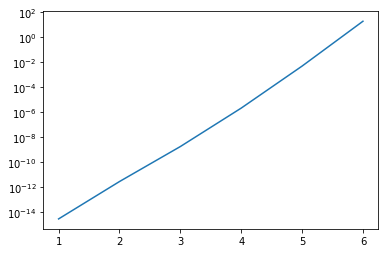

In [16]:

def error(n):

    x_data = np.linspace(2, 4, num=11, endpoint=True)
    poly_grad = n
    poly_coeff = np.ones(poly_grad + 1)
    poly = np.poly1d(poly_coeff)

    y_data = poly(x_data)


    A = np.array([mono(x_data, k) for k in range(0, poly_grad + 1)], dtype=float)
    A = A.transpose()
    Q, R = qr_factor(A)

    b = Q.T @ y_data

    c = la.solve_triangular(R, b)
    return (norm(c - poly_coeff))


error_list = np.zeros(6)

for i in range(1,7):
    error_list[i-1] = error(i)

n = [1,2,3,4,5,6]

plt.figure()

plt.semilogy(n, error_list)
plt.show()

After the $QR$ factorization and computation of the proper rhs vector $\bfb_1$ you 
need to solve $\widehat{R} \bfx = \bfb_1$. To solve a system with a
triangular matrix you can either use your code from the previous lab or
the built-in function [solve_triangular](https://docs.scipy.org/doc/scipy-1.3.0/reference/generated/scipy.linalg.solve_triangular.html?highlight=solve_triangular#scipy.linalg.solve_triangular).

<font color='blue'>
    
   One can see that the error gets drastically larger for $n=6$ implying that the method is sensitiv to rounding errors. 

</font>

__b)__ Next, you are asked to implemented a QR factorization 

In [19]:

def qr_factor_modified(A):
    Q = np.zeros(A.shape)
    R = np.zeros((A.shape[1], A.shape[1]))
    m, n = A.shape

    for j in range(n):

        y = A[:, j]
        for i in range(j):
            r_ij = Q[:, i].T @ y
            R[i, j] = r_ij
            y = y - r_ij * Q[:, i]

        r_jj = norm(y)
        q_j = y / r_jj

        R[j, j] = r_jj
        Q[:, j] = q_j
    return (Q, R)



based the __modified Gram-Schmidt orthogonalization__:

### Algorithm

Let $\bfa_1, \ldots, \bfa_n \in \RR^{m}$ be linearly independent vectors.

```
for j = 1,2,...,n
    y = a_j
    for i = 1,2,...,j-1
        r_ij = q_i^T y
        y = y - r_ij q_i
    end
    r_jj = ||y||
    q_j = y/r_jj
end 
```

from task 1


```
for j = 1,2,...,n
    y = a_j
    for i = 1,2,...,j-1
        r_ij = q_i^T a_j
        y = y - r_ij q_i
    end
    r_jj = ||y||
    q_j = y/r_jj
end 
```

Can you spot the difference to the standard Gram-Schmidt orthogonalization method?
Explain, why this modfied method still a orthogonalization procedure.

<font color='blue'>
    
   Your comments here: The difference is that when computing $r_{ij}$ one uses the ith colum directly from A in task one while here one uses the updated y as the algorithm moves along. 
   
   Why is this still an orthogonalization procedure? We tried to prove that the vectors are stil orthogonal but got lost on the way. 
   

</font>

__c)__ The modified Gram-Schmidt process  is actually more stable with respect to rounding errors than the original/classical one. Test this claim and repeat the experiment from a) but now use the ```qr_factor_modified``` function based on the modified Gram-Schmidt method.
How does the solution $\bfc_n$ compares the one computed with the original Gram-Schmidt method?

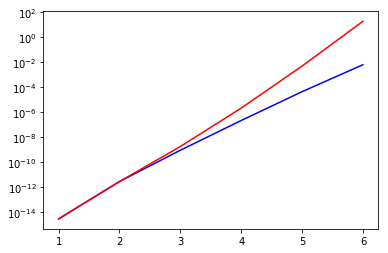

In [25]:
def error_mod(n):

    x_data = np.linspace(2, 4, num=11, endpoint=True)
    poly_grad = n
    poly_coeff = np.ones(poly_grad + 1)
    poly = np.poly1d(poly_coeff)

    y_data = poly(x_data)


    A = np.array([mono(x_data, k) for k in range(0, poly_grad + 1)], dtype=float)
    A = A.transpose()
    Q, R = qr_factor_modified(A)

    b = Q.T @ y_data

    c = la.solve_triangular(R, b)
    return (norm(c - poly_coeff))


error_list_mod = np.zeros(6)
error_list = np.zeros(6)
for i in range(1,7):
    error_list_mod[i-1] = error_mod(i)
    error_list[i-1] = error(i)

    

plt.figure()
plt.semilogy(n, error_list_mod, color = "blue")
plt.semilogy(n, error_list, color = "red")
plt.show()

<font color='blue'>
    
   As one can see the error is smaller for the modified version of the algorith. This seems to support the claim that this method is less sensitiv for rounding errors. 

</font>